In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [50]:
df=pd.read_csv('D:\Data Science\Technocolab\Tasks\Task 1\Bondora_raw/Bondora_raw.csv',low_memory=False)

In [51]:
df.shape

(77394, 42)

In [52]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,...,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,0,0,115.0410,1,2.0,1,61,1.0,EE,319.5582,...,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,0,0,140.6057,0,2.0,1,48,1.0,EE,191.7349,...,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,0,0,319.5580,1,2.0,1,58,1.0,EE,319.5582,...,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,1,2.0,1,23,1.0,EE,127.8233,...,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,0,0,319.5582,1,2.0,1,25,1.0,EE,319.5582,...,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1


In [53]:
bool_data= df.select_dtypes('bool')
bool_data

""
0
1
2
3
4
...
77389
77390
77391
77392


In [54]:
labelEncoder = LabelEncoder()
df["NewCreditCustomer"]= labelEncoder.fit_transform(df["NewCreditCustomer"])
df["Restructured"]= labelEncoder.fit_transform(df["Restructured"])

In [55]:
cat_data= df.select_dtypes('object')
cat_data

,Country,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,Rating,CreditScoreEsMicroL
0,EE,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,NaN
1,EE,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,NaN
2,EE,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,NaN
3,EE,HARJU,PALDISKI,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,NaN
4,EE,TARTU,TARTU,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
77389,FI,PÄIJÄT-HÄME,LAHTI,0,3.0,3.0,3.0,MoreThan5Years,1.0,E,NaN
77390,FI,POHJOIS KARJAALA,JOENSUU,2,3.0,3.0,3.0,MoreThan5Years,8.0,B,NaN
77391,FI,VARSINAIS-SUOMI,SAUVO,0,3.0,1.0,5.0,MoreThan5Years,6.0,D,NaN
77392,EE,VALGA,VALGA,7,5.0,1.0,3.0,MoreThan5Years,17.0,B,NaN


In [56]:
x = df.copy()
y = x.pop("Target")

In [57]:
for colname in x.select_dtypes("object"):
    x[colname], _ = x[colname].factorize()


In [58]:
discrete_features = x.dtypes == int

In [59]:
x = x.fillna(method="bfill")

In [60]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores[::3] 

InterestAndPenaltyBalance         0.342947
InterestAndPenaltyPaymentsMade    0.071130
Amount                            0.043615
Rating                            0.036727
LanguageCode                      0.024531
IncomeTotal                       0.021536
CreditScoreEsMicroL               0.017699
DebtToIncome                      0.009345
EmploymentStatus                  0.007085
HomeOwnershipType                 0.005610
BidsApi                           0.004584
NewCreditCustomer                 0.003788
Education                         0.001844
Gender                            0.000000
Name: MI Scores, dtype: float64

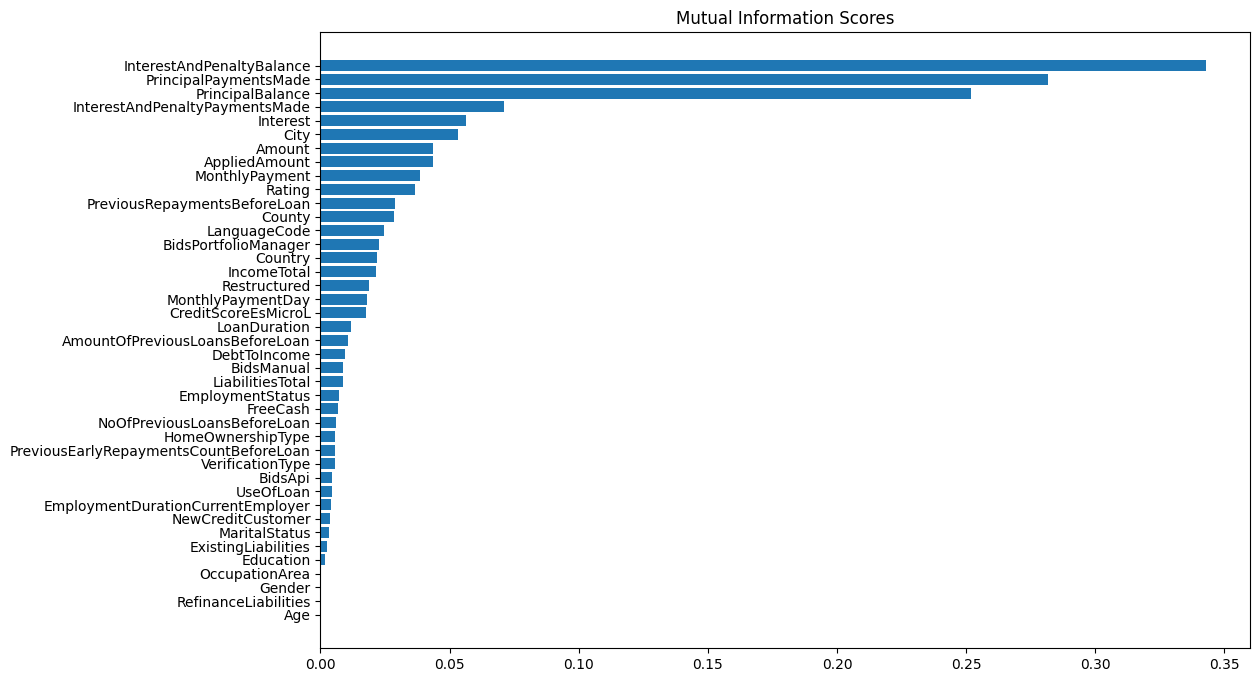

In [61]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(12, 8))
plot_mi_scores(mi_scores)